# Flask Framework and Data Analysis

We using datasets from web scrapping on google playstore, the detail information of the dataset already explained on repository. Down below is the code block separated with cell so that we could analyze the code step by step. for further explained of this code already attached in appa.py file. It is not focused on web scrapping, but on data analysis using python and Flask framework. For web scrapping, visit the next repository

In [32]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64
plt.style.use('seaborn')

app = Flask('try')

In [33]:
playstore = pd.read_csv('data\googleplaystore.csv')
playstore.shape

(10841, 13)

In [34]:
playstore.drop_duplicates(subset = 'App', keep = 'first', inplace=True) 

In [35]:
playstore.shape

(9660, 13)

In [36]:
playstore.Category = playstore.Category.astype('category')
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [37]:
playstore.drop([10472], inplace=True)
playstore.Installs = playstore.Installs.apply(lambda x: x.replace('+',''))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',',''))
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
playstore.Installs=playstore.Installs.astype('int64')
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs             int64
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [39]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


In [40]:
playstore.Price = playstore.Price.apply(lambda x: x.replace('$',''))
playstore.Price = playstore.Price.astype('float64')
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [41]:
playstore[['Reviews','Size']]=playstore[['Reviews','Size']].astype('int64')
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [42]:
top_category = pd.crosstab(
            index = playstore['Category'],
            columns = 'Jumlah'
    ).sort_values('Jumlah',ascending=False).reset_index()
top_category

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [43]:
playstore.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [44]:
s=playstore.groupby(['Category','App']).agg({'Reviews':'sum','Rating':'mean'}).sort_values('Reviews',ascending=False).reset_index().head(10)
s

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


In [45]:
df2 = playstore.copy()

In [46]:
cat_order = df2.groupby('Category').agg({'App': 'count'}).reset_index().rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()
cat_order

,Category,Total
12,FAMILY,1832
15,GAME,959
30,TOOLS,827
5,BUSINESS,420
21,MEDICAL,395


<ipython-input-47-d9d55d92c7fd>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


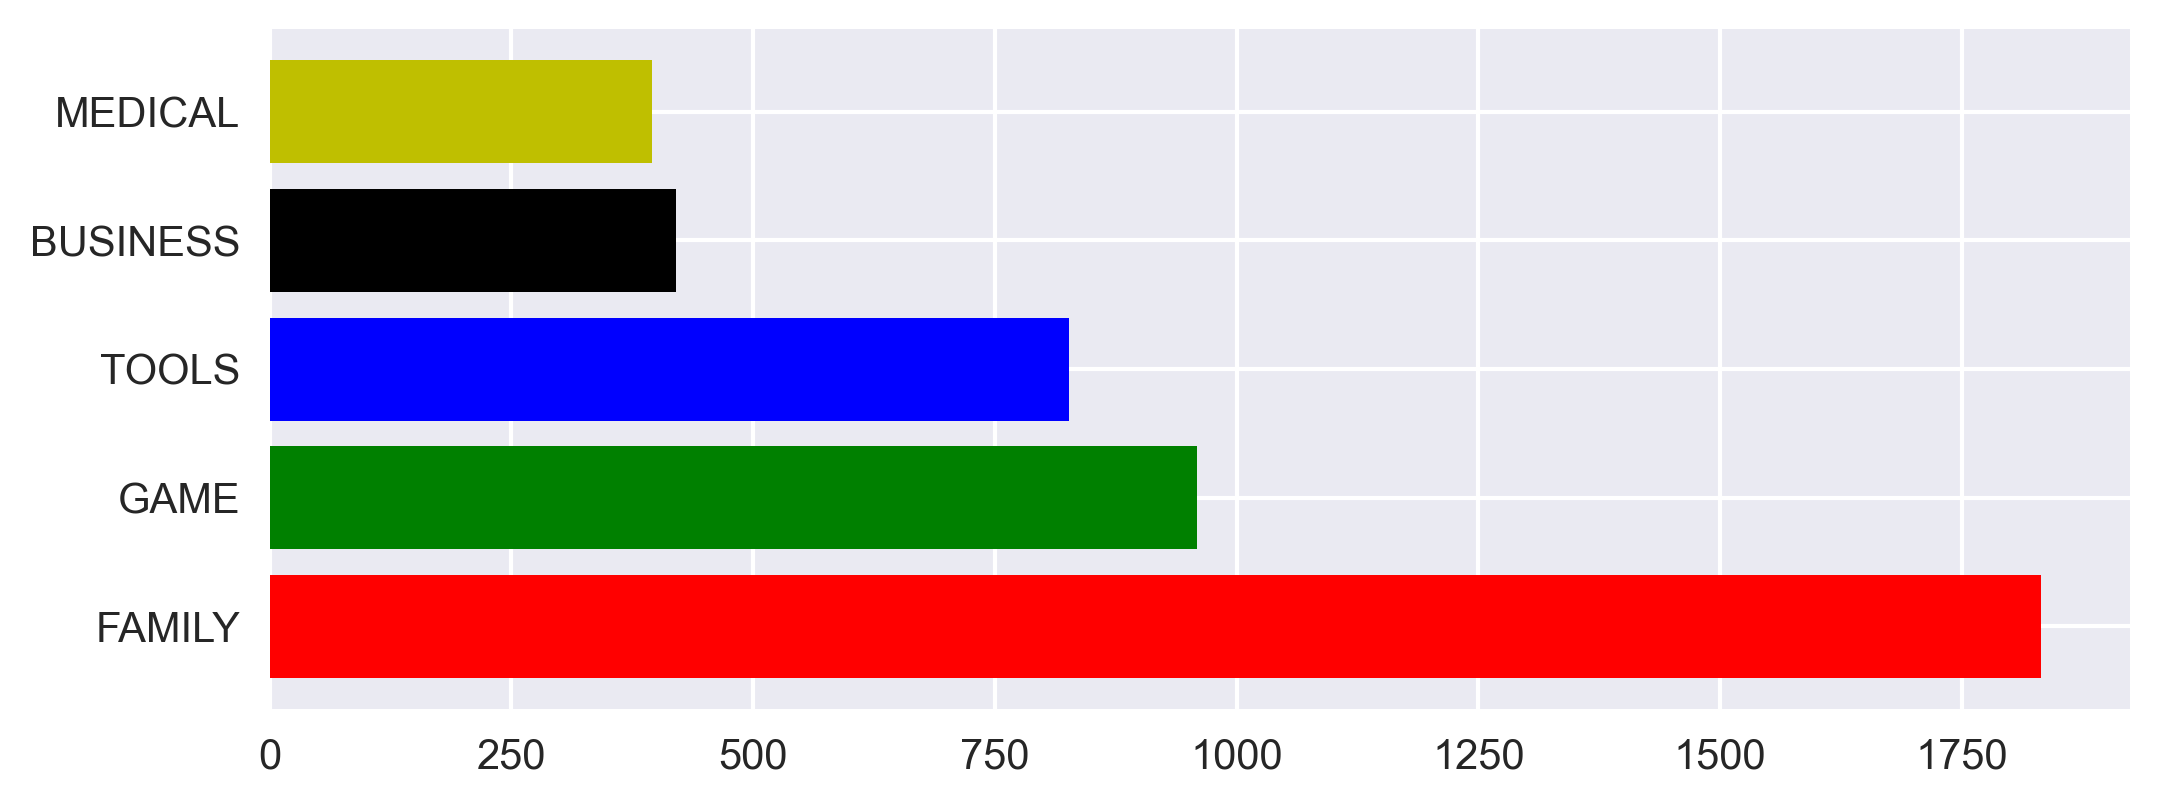

In [47]:
    cat_order = df2.groupby('Category').agg({'App': 'count'}).reset_index().rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()
    X = cat_order.Category
    Y = cat_order.Total
    my_colors = 'rgbkymc'

    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot()

    plt.barh(X,Y, color=my_colors)

    plt.savefig('cat_order.png',bbox_inches="tight") 

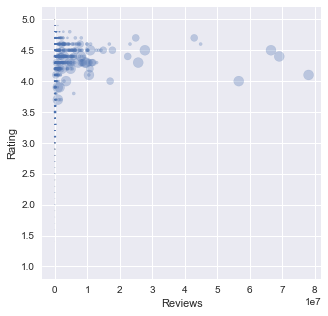

In [48]:
    X = df2['Reviews'].values # axis x
    Y = df2['Rating'].values # axis y
    area = playstore['Installs'].values/10000000 
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()

    plt.scatter(x=X,y=Y,s=area, alpha=0.3)
    plt.xlabel('Reviews')
    plt.ylabel('Rating')
    plt.savefig('rev_rat1.png',bbox_inches="tight")

Text(0, 0.5, 'Frequency')

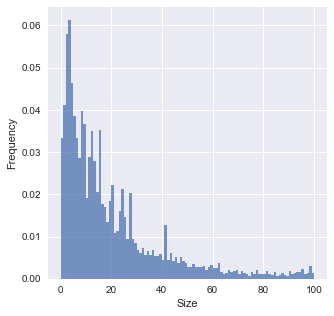

In [49]:
    X=(df2.Size/1000000).values
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.hist(X,bins=100, density=True,  alpha=0.75)
    plt.xlabel('Size')
    plt.ylabel('Frequency')

In [50]:
playstore.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [51]:
playstore[['Type']].value_counts()

Type
Free    8902
Paid     756
dtype: int64

In [52]:
playstore[['Genres']].value_counts()

Genres                             
Tools                                  826
Entertainment                          561
Education                              510
Business                               420
Medical                                395
                                      ... 
Health & Fitness;Action & Adventure      1
Casual;Music & Video                     1
Strategy;Creativity                      1
Communication;Creativity                 1
Travel & Local;Action & Adventure        1
Length: 118, dtype: int64

In [53]:
top5 = df2.groupby(['Genres']).agg({'App':'count'}).reset_index().sort_values('App',ascending=False).head(5).Genres.to_list()
top5

['Tools', 'Entertainment', 'Education', 'Business', 'Medical']

In [54]:
baru = df2.copy()
baru.Genres = pd.Categorical(baru.Genres,categories=top5,ordered=True)

<BarContainer object of 10 artists>

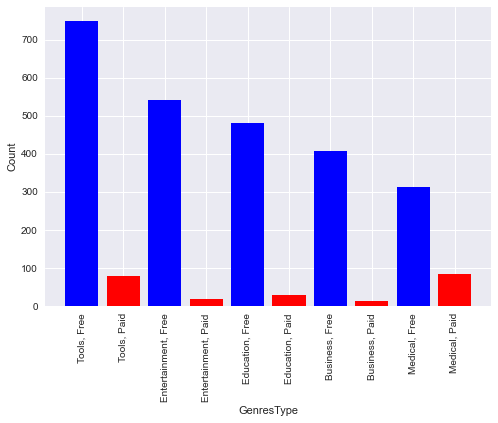

In [55]:
com = pd.pivot_table(
    data = baru,
    index=['Genres','Type'],
    values='App',
    aggfunc='count'
).reset_index()
com.Genres = com.Genres.str.cat(com.Type,sep = ', ')
plt.ylabel('Count')
plt.xlabel('GenresType')
plt.xticks(rotation=90)
plt.bar(x=com.Genres, height=com.App,color=['blue','red','blue','red','blue','red','blue','red','blue','red'])